In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error
from bayes_opt import BayesianOptimization

In [10]:
#df = pd.read_csv('../data/sample submission.csv')
df = pd.read_csv('../data/data.csv', sep=';', encoding='latin1')
print(df)

          Id     Category   Manufacturer     Model  Prod. year Gear box type  \
0       2680         Jeep        HYUNDAI        H1        2014     Automatic   
1       5960        Sedan     MITSUBISHI    Mirage        2002     Automatic   
2       2185         Jeep        HYUNDAI  Santa FE        2014     Automatic   
3      15905        Sedan  MERCEDES-BENZ     E 260        1992        Manual   
4      15337    Universal          HONDA       FIT        2015     Automatic   
...      ...          ...            ...       ...         ...           ...   
16346  19198         Jeep         TOYOTA     RAV 4        2015     Automatic   
16347   3583        Sedan         TOYOTA     Prius        2009     Automatic   
16348  18497         Jeep      SSANGYONG    REXTON        2015     Automatic   
16349   4565  Goods wagon           OPEL     Combo        2011        Manual   
16350  11586        Sedan           FORD    Fusion        2013     Automatic   

      Leather interior Fuel type Engine

# DATOS FALTANTES

In [11]:
# verificar datos faltantes
for col in df.columns.to_list():
  calc = (df[col].isna().sum()/df.shape[0])*100
  print(f'{col} missing Values: {calc}%')

Id missing Values: 0.0%
Category missing Values: 0.0%
Manufacturer missing Values: 0.0%
Model missing Values: 0.0%
Prod. year missing Values: 0.0%
Gear box type missing Values: 0.0%
Leather interior missing Values: 0.0%
Fuel type missing Values: 0.0%
Engine volume missing Values: 0.0%
Drive wheels missing Values: 0.0%
Cylinders missing Values: 0.0%
Mileage missing Values: 0.0%
Doors missing Values: 0.0%
Airbags missing Values: 0.0%
Wheel missing Values: 0.0%
Color missing Values: 0.0%
Sales Fee missing Values: 0.0%
price missing Values: 0.0%


# VARIABLES CATEGÓRICAS

## ENCODING

In [12]:
def label_encoding(dataset, column_name):
    label_encoder = LabelEncoder()
    dataset[column_name] = label_encoder.fit_transform(dataset[column_name])
    return dataset, label_encoder

def frequency_encoding(dataset, col):
    freq = dataset[col].value_counts(normalize=True)
    dataset[col] = dataset[col].map(freq)
    return dataset, freq

In [13]:
df2 = df
def to_zero(n):
  if n == '-': return 0
  return n

def mileage_km(n):
  return n.replace(' km', '')

def turbo(n):
  if 'Turbo' in n: return 1
  return 0

def engine_volume(n):
  return n.replace(' Turbo', '')

def doors(n):
  if n == '>5': return 6
  return n


df2['Turbo'] = df2['Engine volume'].map(turbo)

In [14]:

df2['Sales Fee'] = df2['Sales Fee'].map(to_zero)
df2['Mileage'] = df2['Mileage'].map(mileage_km)
df2['Engine volume'] = df2['Engine volume'].map(engine_volume)
df2['Doors'] = df2['Doors'].map(doors)

df2.head(20)

,Id,Category,Manufacturer,Model,Prod. year,Gear box type,Leather interior,Fuel type,Engine volume,Drive wheels,Cylinders,Mileage,Doors,Airbags,Wheel,Color,Sales Fee,price,Turbo
0,2680,Jeep,HYUNDAI,H1,2014,Automatic,Yes,Diesel,2.5,Front,4,74210,4,4,Left wheel,Silver,777,22433,0
1,5960,Sedan,MITSUBISHI,Mirage,2002,Automatic,No,Petrol,1.8,Front,4,160000,4,2,Left wheel,White,0,7500,0
2,2185,Jeep,HYUNDAI,Santa FE,2014,Automatic,Yes,Diesel,2,Front,4,51106,4,4,Left wheel,White,639,27284,0
3,15905,Sedan,MERCEDES-BENZ,E 260,1992,Manual,No,CNG,2.6,Rear,6,0,4,4,Left wheel,Beige,0,3450,0
4,15337,Universal,HONDA,FIT,2015,Automatic,Yes,Hybrid,1.5,Front,4,35624,4,4,Left wheel,Black,308,26644,0
5,13792,Hatchback,HONDA,FIT,2014,Automatic,Yes,Petrol,1.5,Front,4,78000,4,4,Left wheel,White,501,25638,0
6,12015,Microbus,FORD,Transit,2007,Manual,No,Diesel,2.4,Rear,4,165000,4,2,Left wheel,Blue,0,17249,0
7,307,Sedan,TOYOTA,Camry,2015,Automatic,Yes,Hybrid,2.5,Front,4,35000,4,10,Left wheel,Grey,456,39201,0
8,1054,Sedan,TOYOTA,Camry,2012,Automatic,Yes,Hybrid,2.5,Front,4,156518,4,12,Left wheel,White,781,3607,0
9,7945,Sedan,HYUNDAI,Elantra,2012,Automatic,Yes,Petrol,1.6,Front,4,165294,4,4,Left wheel,Silver,531,16308,0


In [15]:
df2, freq_category = frequency_encoding(df2, 'Category')
df2, freq_manufacturer = frequency_encoding(df2, 'Manufacturer')
df2, freq_model = frequency_encoding(df2, 'Model')
# Prod. Year
df2, freq_gear_box_type = frequency_encoding(df2, 'Gear box type')
df2, label_leather_interior = label_encoding(df2, 'Leather interior')
df2, freq_fuel_type = frequency_encoding(df2, 'Fuel type')
# Engine volume: quitar el turbo y crear variable aparte
df2, freq_drive_wheels = frequency_encoding(df2, 'Drive wheels')
# Cylinders
df2, freq_mileage = frequency_encoding(df2, 'Mileage') # quitar km
# Doors: cambiar >5 por 4
# Airbags
df2, freq_wheel = frequency_encoding(df2, 'Wheel')
df2, freq_color = frequency_encoding(df2, 'Color')
# Sales Fee: cambiar '-' por '0'
df2.head()

,Id,Category,Manufacturer,Model,Prod. year,Gear box type,Leather interior,Fuel type,Engine volume,Drive wheels,Cylinders,Mileage,Doors,Airbags,Wheel,Color,Sales Fee,price,Turbo
0,2680,0.287567,0.196869,0.022567,2014,0.702832,1,0.211363,2.5,0.670907,4,0.000061,4,4,0.922512,0.195951,777,22433,0
1,5960,0.453183,0.015106,0.000428,2002,0.702832,0,0.528286,1.8,0.670907,4,0.006483,4,2,0.922512,0.233380,0,7500,0
2,2185,0.287567,0.196869,0.027521,2014,0.702832,1,0.211363,2,0.670907,4,0.000122,4,4,0.922512,0.233380,639,27284,0
3,15905,0.453183,0.105315,0.000061,1992,0.096875,0,0.024524,2.6,0.118097,6,0.036817,4,4,0.922512,0.006850,0,3450,0
4,15337,0.018592,0.050028,0.022690,2015,0.702832,1,0.185065,1.5,0.670907,4,0.000061,4,4,0.922512,0.261941,308,26644,0


# OUTLIERS

In [16]:
for col in df2.columns:
    df2[col] = pd.to_numeric(df2[col])

In [17]:
# Crear características adicionales basadas en correlaciones y relaciones avanzadas
df2['Mileage_Engine_ratio'] = df2['Mileage'] / (df2['Engine volume'] + 1)
df2['Age'] = 2024 - df2['Prod. year']
df2['FuelType_SalesFee'] = df2['Fuel type'] * df2['Sales Fee']
df2['Mileage_Age'] = df2['Mileage'] * df2['Age']
df2['EngineVolume_Cylinders'] = df2['Engine volume'] * df2['Cylinders']
df2['Mileage_Engine_Age'] = df2['Mileage'] * df2['Engine volume'] * df2['Age']
df2['SalesFee_per_EngineVolume'] = df2['Sales Fee'] / (df2['Engine volume'] + 1)
df2['Mileage_Age_squared'] = (df2['Mileage'] * df2['Age']) ** 2
df2['EngineVolume_Cylinders_squared'] = (df2['Engine volume'] * df2['Cylinders']) ** 2
df2['log_Mileage'] = np.log1p(df2['Mileage'])
df2['SalesFee_Mileage_Ratio'] = df2['Sales Fee'] / (df2['Mileage'] + 1)
df2['Age_SalesFee'] = df2['Age'] * df2['Sales Fee']
df2['Mileage_Age_Log'] = np.log1p(df2['Mileage_Age'])
df2['SalesFee_Cylinders'] = df2['Sales Fee'] * df2['Cylinders']

# Nuevas características añadidas
df2['Displacement_Mileage'] = df2['Engine volume'] * df2['Mileage']
df2['Age_Engine_Interaction'] = df2['Age'] * df2['Engine volume']
df2['Cylinders_SalesFee_Interaction'] = df2['Cylinders'] * df2['Sales Fee']
df2['EngineVolume_Log'] = np.log1p(df2['Engine volume'])
df2['Mileage_Cylinders'] = df2['Mileage'] * df2['Cylinders']

In [18]:
# Tratar con outliers
def cuantificaOutliers(dataset):
  for col in dataset.columns:
    q1, q3 = np.percentile(dataset[col],[25,75])
    iqr = q3-q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    outlier = dataset[(dataset[col]<lower_bound)|(dataset[col]>upper_bound)]
    print(col, ' ', outlier.shape[0], ' ', outlier.shape[0]/dataset.shape[0]*100, '%')

cuantificaOutliers(df2)

Id   0   0.0 %
Category   0   0.0 %
Manufacturer   0   0.0 %
Model   0   0.0 %
Prod. year   824   5.039447128615987 %
Gear box type   0   0.0 %
Leather interior   0   0.0 %
Fuel type   0   0.0 %
Engine volume   1184   7.241147330438505 %
Drive wheels   0   0.0 %
Cylinders   4140   25.31955232095896 %
Mileage   2015   12.323405296312153 %
Doors   763   4.666381261084949 %
Airbags   0   0.0 %
Wheel   1267   7.7487615436364745 %
Color   0   0.0 %
Sales Fee   136   0.831753409577396 %
price   901   5.510366338450248 %
Turbo   1618   9.89541924041343 %
Mileage_Engine_ratio   2058   12.586386153752063 %
Age   824   5.039447128615987 %
FuelType_SalesFee   355   2.171121032352761 %
Mileage_Age   2240   13.699467922451225 %
EngineVolume_Cylinders   3426   20.952846920677633 %
Mileage_Engine_Age   2150   13.149042871995597 %
SalesFee_per_EngineVolume   39   0.23851752186410616 %
Mileage_Age_squared   3023   18.488165861415204 %
EngineVolume_Cylinders_squared   3636   22.237172038407437 %
log_Mil

In [19]:
def Modifica_Outliers (dataset,columna):
  q1, q3 = np.percentile(dataset[columna], [25, 75])
  # Calculate the interquartile range
  iqr = q3 - q1
  # Calculate the lower and upper bounds
  lower_limit = q1 - (1.5 * iqr)
  upper_limit = q3 + (1.5 * iqr)

  dataset[columna] = np.where(dataset[columna]>upper_limit,upper_limit,np.where(dataset[columna]<lower_limit,lower_limit,dataset[columna]))
  return (dataset)

Modifica_Outliers(df2,'Engine volume')
Modifica_Outliers(df2,'Prod. year')
Modifica_Outliers(df2,'Mileage')
Modifica_Outliers(df2,'Sales Fee')
cuantificaOutliers(df2)

Id   0   0.0 %
Category   0   0.0 %
Manufacturer   0   0.0 %
Model   0   0.0 %
Prod. year   0   0.0 %
Gear box type   0   0.0 %
Leather interior   0   0.0 %
Fuel type   0   0.0 %
Engine volume   0   0.0 %
Drive wheels   0   0.0 %
Cylinders   4140   25.31955232095896 %
Mileage   0   0.0 %
Doors   763   4.666381261084949 %
Airbags   0   0.0 %
Wheel   1267   7.7487615436364745 %
Color   0   0.0 %
Sales Fee   0   0.0 %
price   901   5.510366338450248 %
Turbo   1618   9.89541924041343 %
Mileage_Engine_ratio   2058   12.586386153752063 %
Age   824   5.039447128615987 %
FuelType_SalesFee   355   2.171121032352761 %
Mileage_Age   2240   13.699467922451225 %
EngineVolume_Cylinders   3426   20.952846920677633 %
Mileage_Engine_Age   2150   13.149042871995597 %
SalesFee_per_EngineVolume   39   0.23851752186410616 %
Mileage_Age_squared   3023   18.488165861415204 %
EngineVolume_Cylinders_squared   3636   22.237172038407437 %
log_Mileage   2015   12.323405296312153 %
SalesFee_Mileage_Ratio   136   0

# ANÁLISIS DE CORRELACIÓN

<Axes: >

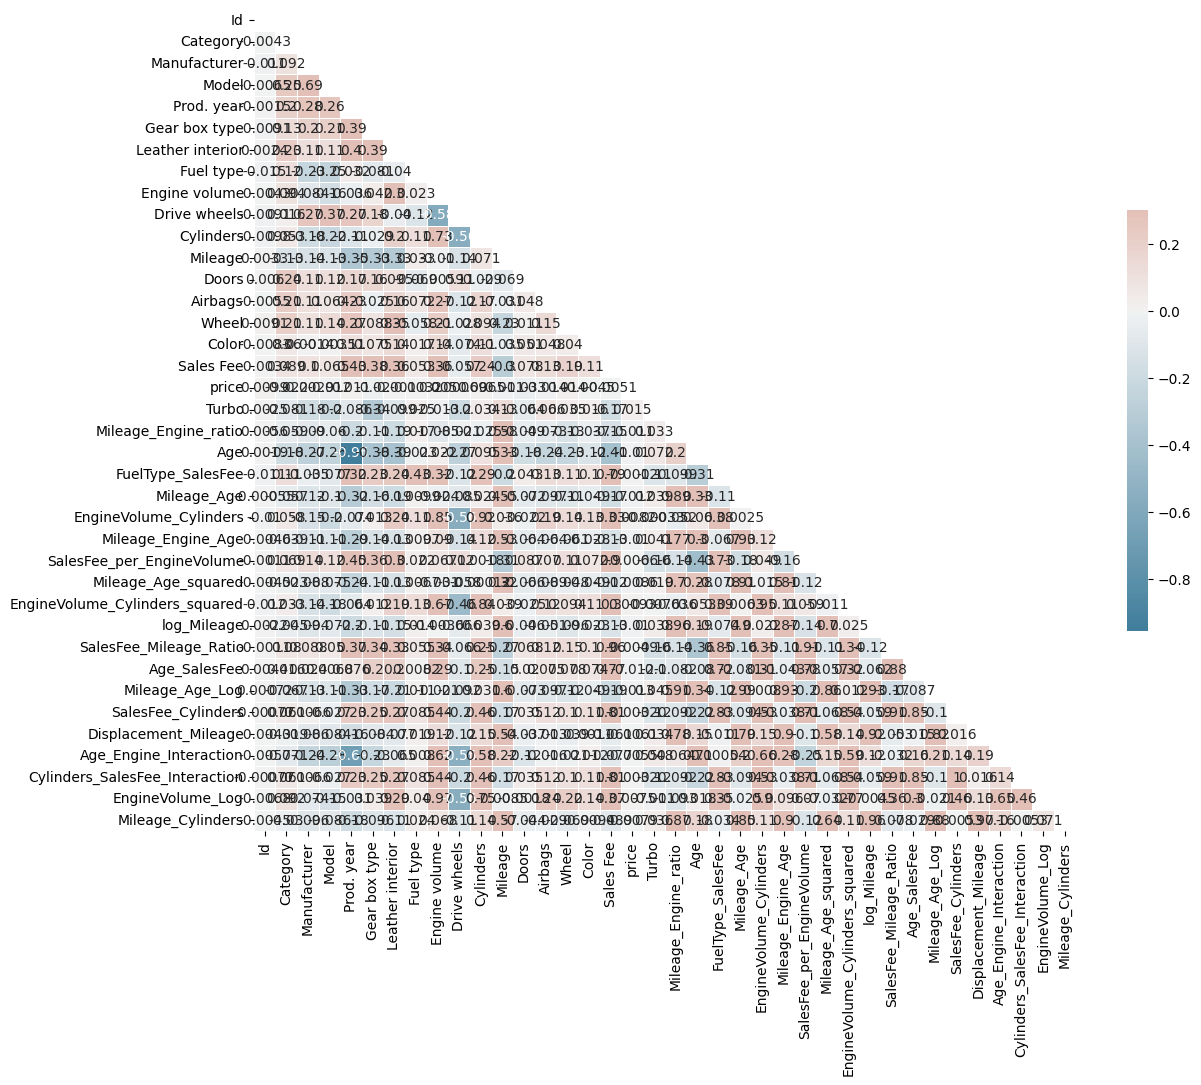

In [20]:
# Realizar un análisis de correlación
corr = df2.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.tight_layout()
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={'shrink':0.5}, annot=True)

In [21]:
correlations = df2.corr()['price'].abs().sort_values(ascending=False)
print("Correlación con la variable objetivo (Curado):\n", correlations)

Correlación con la variable objetivo (Curado):
 price                             1.000000
Doors                             0.032986
Category                          0.021632
Gear box type                     0.020325
Turbo                             0.015388
Wheel                             0.013929
Airbags                           0.013830
Mileage_Age_Log                   0.012864
Mileage_Age                       0.012154
Model                             0.012108
Age_SalesFee                      0.011733
Mileage_Engine_ratio              0.011248
Prod. year                        0.010756
Mileage                           0.010522
Mileage_Engine_Age                0.010138
log_Mileage                       0.010096
Age                               0.010010
Id                                0.009915
EngineVolume_Cylinders_squared    0.009327
Mileage_Age_squared               0.008617
EngineVolume_Cylinders            0.008155
Mileage_Cylinders                 0.007926
Engine

# VARIABLES

In [22]:
df3 = df2
df3 = df3.drop('Cylinders', axis=1)
df3 = df3.drop('Sales Fee', axis=1)
df3 = df3.drop('Color', axis=1)
df3 = df3.drop('Mileage', axis=1)
df3 = df3.drop('Fuel type', axis=1)
df3 = df3.drop('Manufacturer', axis=1)
df3 = df3.drop('Leather interior', axis=1)
df3 = df3.drop('Drive wheels', axis=1)
df3.head()

,Id,Category,Model,Prod. year,Gear box type,Engine volume,Doors,Airbags,Wheel,price,...,log_Mileage,SalesFee_Mileage_Ratio,Age_SalesFee,Mileage_Age_Log,SalesFee_Cylinders,Displacement_Mileage,Age_Engine_Interaction,Cylinders_SalesFee_Interaction,EngineVolume_Log,Mileage_Cylinders
0,2680,0.287567,0.022567,2014.0,0.702832,2.5,4,4,0.922512,22433,...,0.000061,776.952483,7770,0.000611,3108,0.000153,25.0,3108,1.252763,0.000245
1,5960,0.453183,0.000428,2002.0,0.702832,1.8,4,2,0.922512,7500,...,0.006462,0.000000,0,0.133325,0,0.011669,39.6,0,1.029619,0.025931
2,2185,0.287567,0.027521,2014.0,0.702832,2.0,4,4,0.922512,27284,...,0.000122,638.921849,6390,0.001222,2556,0.000245,20.0,2556,1.098612,0.000489
3,15905,0.453183,0.000061,2000.0,0.096875,2.6,4,4,0.922512,3450,...,0.036156,0.000000,0,0.778478,0,0.095725,83.2,0,1.280934,0.220904
4,15337,0.018592,0.022690,2015.0,0.702832,1.5,4,4,0.922512,26644,...,0.000061,307.981164,2772,0.000550,1232,0.000092,13.5,1232,0.916291,0.000245


In [23]:
df4 = df3
y = df4['price']
x = df4.drop('price', axis=1)

# MODELO

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separar Dataset en Training y Testing Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Definir función para calcular el RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Función de evaluación para Random Forest
def random_forest_evaluate(max_depth, n_estimators, max_features, min_samples_split, min_samples_leaf):
    model = RandomForestRegressor(
        max_depth=int(max_depth),
        n_estimators=int(n_estimators),
        max_features=max_features,
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=42,
        n_jobs=-1  # Usar todos los procesadores disponibles
    )
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_test)
    return -root_mean_squared_error(y_test, y_val_pred)

# Definir límites para los parámetros de optimización
param_bounds = {
    'max_depth': (5, 15),
    'n_estimators': (100, 1000),
    'max_features': (0.1, 0.9),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5)
}

# Ejecutar optimización bayesiana
optimizer = BayesianOptimization(f=random_forest_evaluate, pbounds=param_bounds, random_state=42, verbose=2)
optimizer.maximize(init_points=10, n_iter=25)

# Obtener los mejores parámetros
best_params = optimizer.max['params']
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['min_samples_split'] = int(best_params['min_samples_split'])
best_params['min_samples_leaf'] = int(best_params['min_samples_leaf'])

print("Mejores parámetros encontrados:")
print(best_params)

# Inicializar y entrenar el modelo con los mejores parámetros
rf_regressor = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
rf_regressor.fit(x_train, y_train)

# Hacer predicciones
y_pred = rf_regressor.predict(x_test)

# Calcular y mostrar el RMSE en el conjunto de prueba
test_rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE en el conjunto de prueba:", test_rmse)


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -4.601e+0 | 8.745     | 0.8606    | 3.928     | 6.789     | 240.4     |
| 2         | -4.601e+0 | 6.56      | 0.1465    | 4.465     | 6.809     | 737.3     |
| 3         | -4.601e+0 | 5.206     | 0.8759    | 4.33      | 3.699     | 263.6     |
| 4         | -4.601e+0 | 6.834     | 0.3434    | 3.099     | 5.456     | 362.1     |
| 5         | -4.601e+0 | 11.12     | 0.2116    | 2.169     | 4.931     | 510.5     |
| 6         | -4.601e+0 | 12.85     | 0.2597    | 3.057     | 6.739     | 141.8     |
| 7         | -4.601e+0 | 11.08     | 0.2364    | 1.26      | 9.591     | 969.1     |
| 8         | -4.6e+05  | 13.08     | 0.3437    | 1.391     | 7.474     | 496.1     |
| 9         | -4.601e+0 | 6.22      | 0.4961    | 1.138     | 9.275     | 332.9     |
| 10        | -4.601e+0 | 11.63     | 0.3494    | 3.08

# EVALUACIÓN

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Root Mean Squared Error (RMSE): 460037.48140280676
R^2 Score: 0.000288458367386335


In [26]:
from sklearn.model_selection import cross_val_score

#  cross-validation
cv_scores = cross_val_score(rf_regressor, x, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print("Cross-Validated RMSE:", cv_rmse.mean())

Cross-Validated RMSE: 131302.9645293274


# OUTPUT FILE

In [29]:

df_eval = pd.read_csv('../data/Evaluation.csv', sep=';', encoding='latin1')

df_eval['Turbo'] = df_eval['Engine volume'].map(turbo)

df_eval['Sales Fee'] = df_eval['Sales Fee'].map(to_zero)
df_eval['Mileage'] = df_eval['Mileage'].map(mileage_km)
df_eval['Engine volume'] = df_eval['Engine volume'].map(engine_volume)
df_eval['Doors'] = df_eval['Doors'].map(doors)

df_eval['Category'] = df_eval['Category'].map(freq_category).fillna(0)
df_eval['Manufacturer'] = df_eval['Manufacturer'].map(freq_manufacturer)
df_eval['Model'] = df_eval['Model'].map(freq_model)
df_eval['Gear box type'] = df_eval['Gear box type'].map(freq_gear_box_type)
df_eval['Leather interior'] = label_leather_interior.transform(df_eval['Leather interior'])
df_eval['Fuel type'] = df_eval['Fuel type'].map(freq_fuel_type)
df_eval['Drive wheels'] = df_eval['Drive wheels'].map(freq_drive_wheels)
df_eval['Mileage'] = df_eval['Mileage'].map(freq_mileage)
df_eval['Wheel'] = df_eval['Wheel'].map(freq_wheel)
df_eval['Color'] = df_eval['Color'].map(freq_color)

for col in df_eval.columns:
    df_eval[col] = pd.to_numeric(df_eval[col])

# Aplicar las mismas características en el conjunto de evaluación
df_eval['Mileage_Engine_ratio'] = df_eval['Mileage'] / (df_eval['Engine volume'] + 1)
df_eval['Age'] = 2024 - df_eval['Prod. year']
df_eval['FuelType_SalesFee'] = df_eval['Fuel type'] * df_eval['Sales Fee']
df_eval['Mileage_Age'] = df_eval['Mileage'] * df_eval['Age']
df_eval['EngineVolume_Cylinders'] = df_eval['Engine volume'] * df_eval['Cylinders']
df_eval['Mileage_Engine_Age'] = df_eval['Mileage'] * df_eval['Engine volume'] * df_eval['Age']
df_eval['SalesFee_per_EngineVolume'] = df_eval['Sales Fee'] / (df_eval['Engine volume'] + 1)
df_eval['Mileage_Age_squared'] = (df_eval['Mileage'] * df_eval['Age']) ** 2
df_eval['EngineVolume_Cylinders_squared'] = (df_eval['Engine volume'] * df_eval['Cylinders']) ** 2
df_eval['log_Mileage'] = np.log1p(df_eval['Mileage'])
df_eval['SalesFee_Mileage_Ratio'] = df_eval['Sales Fee'] / (df_eval['Mileage'] + 1)
df_eval['Age_SalesFee'] = df_eval['Age'] * df_eval['Sales Fee']
df_eval['Mileage_Age_Log'] = np.log1p(df_eval['Mileage_Age'])
df_eval['SalesFee_Cylinders'] = df_eval['Sales Fee'] * df_eval['Cylinders']

# Nuevas características añadidas al conjunto de evaluación
df_eval['Displacement_Mileage'] = df_eval['Engine volume'] * df_eval['Mileage']
df_eval['Age_Engine_Interaction'] = df_eval['Age'] * df_eval['Engine volume']
df_eval['Cylinders_SalesFee_Interaction'] = df_eval['Cylinders'] * df_eval['Sales Fee']
df_eval['EngineVolume_Log'] = np.log1p(df_eval['Engine volume'])
df_eval['Mileage_Cylinders'] = df_eval['Mileage'] * df_eval['Cylinders']

df_eval = df_eval.drop('Cylinders', axis=1)
df_eval = df_eval.drop('Sales Fee', axis=1)
df_eval = df_eval.drop('Color', axis=1)
df_eval = df_eval.drop('Mileage', axis=1)
df_eval = df_eval.drop('Fuel type', axis=1)
df_eval = df_eval.drop('Manufacturer', axis=1)
df_eval = df_eval.drop('Leather interior', axis=1)
df_eval = df_eval.drop('Drive wheels', axis=1)

print(df_eval)

         Id  Category     Model  Prod. year  Gear box type  Engine volume  \
0     15246  0.453183  0.048560        2014       0.702832            1.8   
1      5176  0.453183  0.049477        2013       0.702832            2.5   
2      3143  0.287567  0.002324        2009       0.702832            2.4   
3      3360  0.287567  0.000550        2011       0.096875            3.8   
4      3105  0.027093  0.001835        2013       0.702832            0.0   
...     ...       ...       ...         ...            ...            ...   
2881  17665  0.453183  0.056021        2009       0.702832            1.5   
2882   6554  0.287567  0.027521        2015       0.702832            2.4   
2883  18661  0.453183  0.017369        2014       0.702832            1.5   
2884   6825  0.453183  0.000673        2014       0.702832            3.5   
2885  11266  0.015779  0.011009        1996       0.096875            2.5   

      Doors  Airbags     Wheel  Turbo  ...  log_Mileage  \
0         4     

In [30]:
output = rf_regressor.predict(df_eval)
id_column = df_eval['Id']

predicted_df = pd.DataFrame({
    'id': id_column,
    'price': output
})

print(predicted_df)

         id         price
0     15246  17364.513261
1      5176   3727.762752
2      3143  15956.014269
3      3360  40367.327000
4      3105   7379.743039
...     ...           ...
2881  17665   3902.198832
2882   6554   4509.900019
2883  18661   8839.516217
2884   6825  32479.882284
2885  11266  14184.829578

[2886 rows x 2 columns]


In [31]:
predicted_df.to_csv('../results/13.csv', index=False)